# Titanic Example Project

This example project takes a list of passengers that were aboard the Titanic and by applying various data analysis techniques allows us to answer various questions such as:

 - Who were the passengers on the Titanic?
- Comparing Male Vs Female
- Comparing Male Vs Female By Passenger Class
- Separating The Children

 - What factors may have affected their survival?

Data Source:

https://www.kaggle.com/c/titanic

Tools Used:

- Pandas
- Numpy
- MatPlotLib.PyPlot
- Seaborn


In [1]:
# Import Tools Required

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Import Data Required And Create Data Frame

titanic_df = pd.read_csv('train.csv')


In [3]:
# Preview The Data (Headings + Top 5 Records)

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get Summary Info About The Data (Column Heading, # Of Records, Data Type)

titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Who Were The Passengers On The Titanic?

### Comparing Male Vs Female

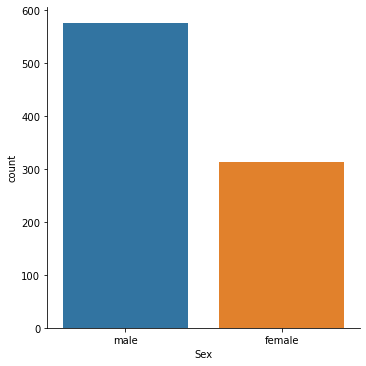

In [5]:
sns.catplot(x='Sex',data=titanic_df,kind='count')


There were roughly **twice as many men as there were women** on board the Titanic.

Notes:
- Catplot is a relatively new addition to Seaborn that simplifies plotting involving categorical variables.
- In Seaborn version v0.9.0 that came out in July 2018, the older factorplot was changed to catplot to make it more consistent with terminology in pandas and in seaborn.

Source: <a href="https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/" target="_blank">https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/</a>

### Comparing Male Vs Female By Passenger Class

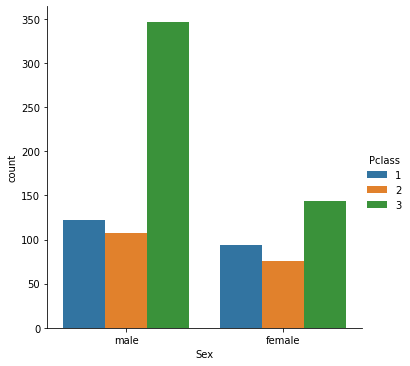

In [6]:
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')


There were **more than twice as many men as there were women** travelling in third class.


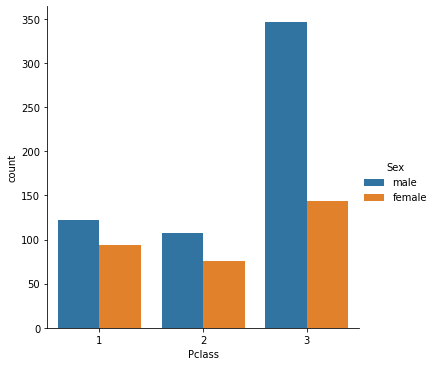

In [7]:
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')


Grouping passengers by Passenger Class instead of Sex.

### Separating The Children

In [8]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex


In [9]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)


In [10]:
titanic_df[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


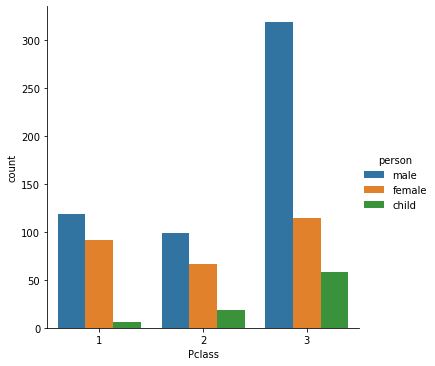

In [11]:
# Comparing Male, Female, Class And Including Children

sns.catplot(x='Pclass',data=titanic_df,hue='person',kind='count')


The **majority of children were travelling in third class**.

### What Age Were The Passengers? 

<AxesSubplot:>

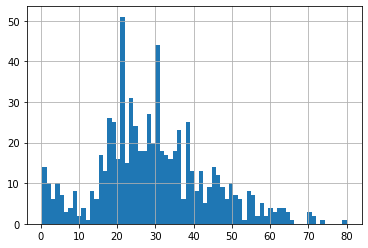

In [12]:
# Age Histogram

titanic_df['Age'].hist(bins=70)


In [13]:
titanic_df['Age'].mean()


29.69911764705882

The majority of passengers were **between the ages of 20 and 40 with the mean age being 29**.

Notes:

- Matplotlib is a library in Python and it is a numerical – mathematical extension for the NumPy library.
- Pyplot is a state-based interface to a Matplotlib module which provides a MATLAB-like interface.
- The matplotlib.pyplot.hist() function in the pyplot module of matplotlib library is used to plot a histogram.
- A histogram is a graphical display of data using bars of different heights, it is similar to a Bar Chart, but a histogram groups numbers into ranges.
- The mean is the average of the numbers. It is easy to calculate: add up all the numbers, then divide by how many numbers there are. In other words it is the sum divided by the count also known as the average.

Source: <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_blank">https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/</a>


In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

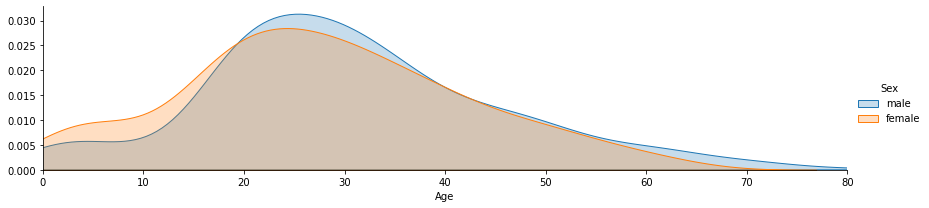

In [15]:
# Male Vs Female Kernel Density Estimation Distribution

fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

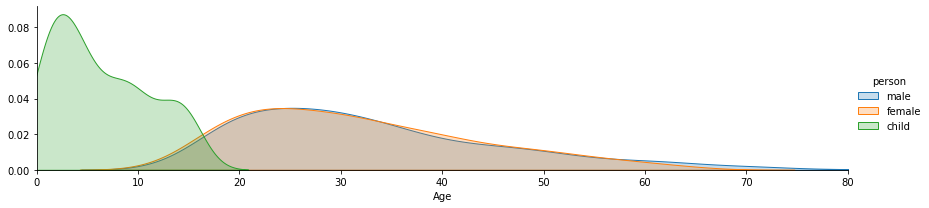

In [16]:
# Male Vs Female Including Children Kernel Density Estimation Distribution

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

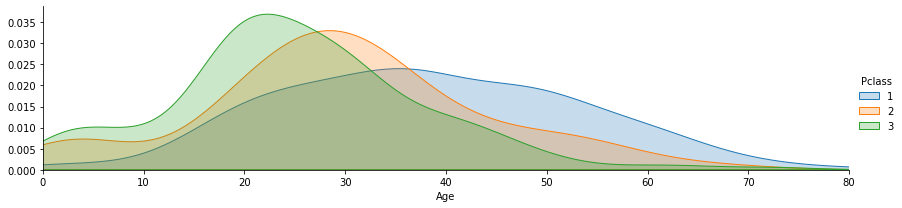

In [17]:
# Passenger Class Kernel Density Estimation Distribution

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
deck = titanic_df['Cabin'].dropna()

In [20]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

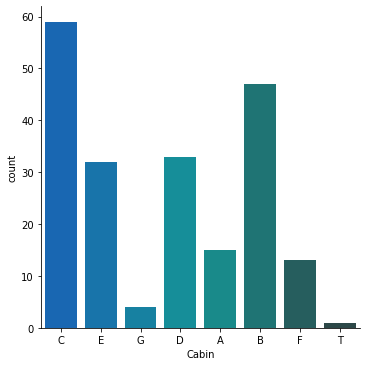

In [21]:
# How many people were on each deck?

levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.catplot(x='Cabin',data=cabin_df,palette='winter_d',kind='count')


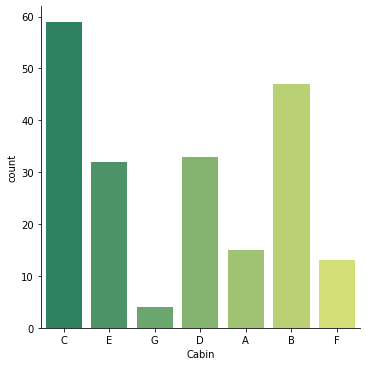

In [22]:
# How many people were on each deck (excluding deck T)?

cabin_df = cabin_df[cabin_df.Cabin !='T']

sns.catplot(x='Cabin',data=cabin_df,palette='summer',kind='count')

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


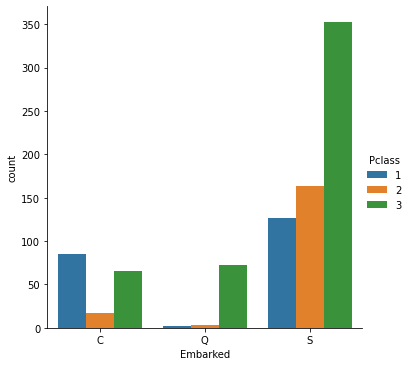

In [24]:
# Where were passengers from by passenger class?

sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')

In [25]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [27]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [28]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [29]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'

C:\Users\mrloc\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
url_info = 'https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas'

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


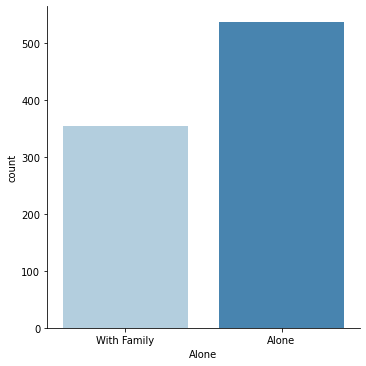

In [32]:
# How many people were Alone vs With Family?

sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count')

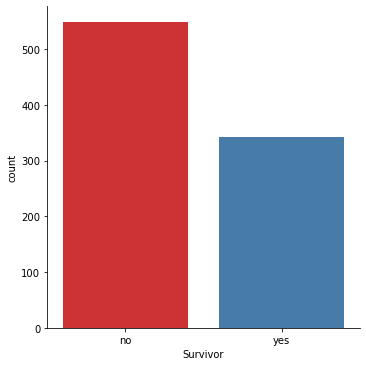

In [33]:
# How many people survived vs didn't?

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot(x='Survivor',data=titanic_df,palette='Set1',kind='count')

C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


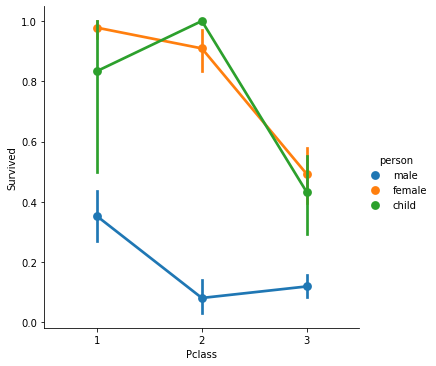

In [34]:
# Did passenger class play a factor in survival rates?

sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


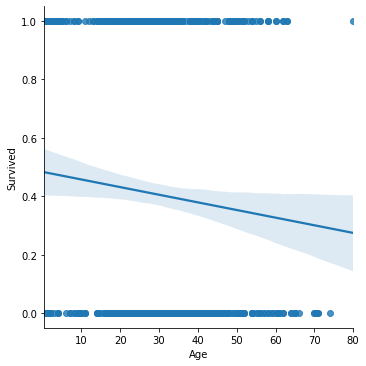

In [35]:
# Did age play a factor?

sns.lmplot('Age','Survived',data=titanic_df)

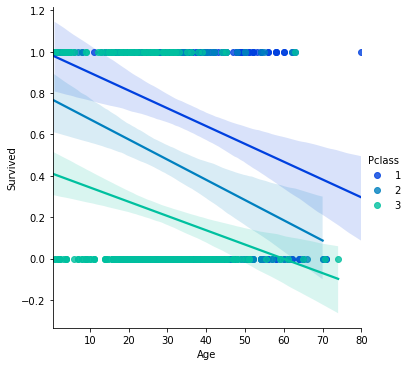

In [36]:
# Comparing age and passenger class

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

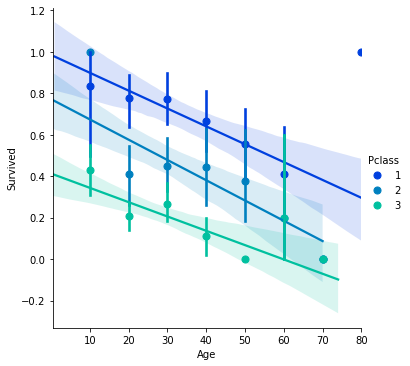

In [37]:
generations = [10,20,30,40,50,60,70,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

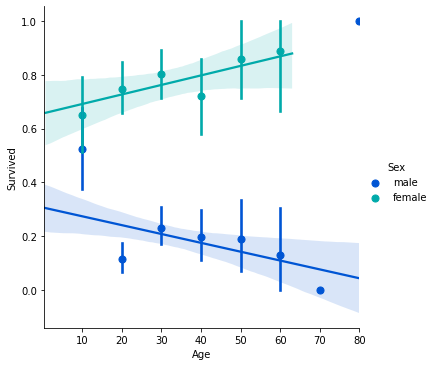

In [38]:
# Comparing age, passenger class and sex

sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

1) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2) Did having a family member increase the odds of surviving the crash?


C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
Name: Survived, dtype: float64

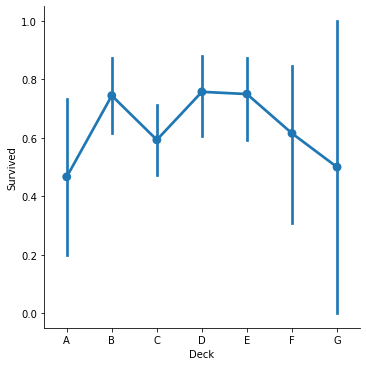

In [39]:
# Deck level vs survival rate

deckSurvivalDF = titanic_df[['Survived','Cabin']].copy().dropna()


def deck_finder(cabin):

    return cabin[0][0]

deckSurvivalDF['Deck'] = deckSurvivalDF[['Cabin']].apply(deck_finder,axis=1)

deckSurvivalDF = deckSurvivalDF[deckSurvivalDF.Deck != 'T']

ok= deckSurvivalDF.drop('Cabin',axis=1)

ok

#Only has two columns ('survived' and 'Deck')

sns.factorplot(x = 'Deck',y = 'Survived',data=ok, order=['A','B','C','D','E','F','G'])

#Factor plot showing mean with Std?

#Numerical Methods

group1 = deckSurvivalDF['Survived'].groupby(deckSurvivalDF['Deck'])

group1.mean()

#Deck D, E and B has the highest survived rate.

C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


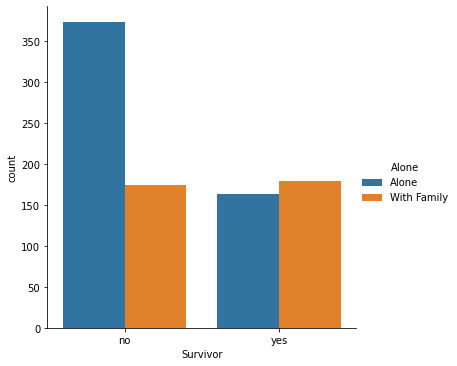

In [40]:
# Having family vs survival rate

sns.factorplot('Survivor', data=titanic_df, hue='Alone', kind='count', hue_order=['Alone', 'With Family'])

C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


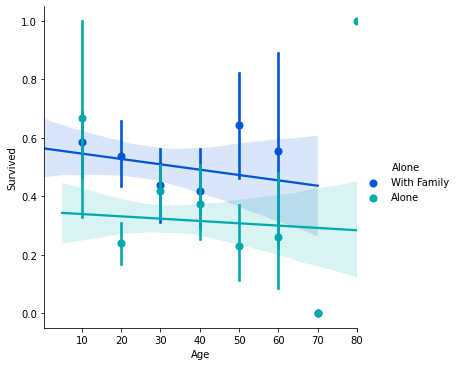

In [41]:
sns.lmplot('Age', 'Survived', hue='Alone', data=titanic_df, palette='winter', x_bins=generations)